## Import libraries

In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from datetime import datetime

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Using ipynb import functions defined in other nb
sys.path.append("myfun/")
from ipynb.fs.defs.myfun_load_dataset import *
from ipynb.fs.full.myfun_model_nn import *
from ipynb.fs.defs.myfun_plot import *

2023-09-11 20:20:25.406761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow/Keras: 2.11.0
sklearn: 1.3.0


## Data Acquisition

In [2]:
# Load the dataset
par_dir = os.path.dirname(os.getcwd()) # parent dir
dir_name = par_dir + "/NN-interaction"
processed_flag = 'post'
merged_df, dflist = load_dataset(dir_name, processed_flag)

In [3]:
dataset = dflist[7:9]

In [4]:
r = 0
for d in dataset:
    r += d.shape[0]
print(r)

30


## Get $v_{0}$ mean over each df looping on dflist

In [5]:
# params
doe = [1,2,1]
v0_guess = 30
NUM_ITER = 1
LEARNING_RATE_v0 = 0.5
flag_save = False

----------------------------------------------------------------------------------------------------


NN structure: 1-2-1
****************************************************************************************************
In df n.8/2 we have 21 scenes
df n.8, scene n.0/21
    We have 3 time intervals inside [36.44,37.04]
            - Time interval n.0: [36.44, 36.64]
                * y_true: [16.4303266   8.20020738]
                * v_ann: [0.14005735516548157, 0.0005558006232604384, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [36.64, 36.84]
                * y_true: [18.55044671  6.80018642]
                * v_ann: [0.20149461925029755, 0.001012599328532815, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [36.84, 37.04]
                * y_true: [12.9262384  10.75446129]
                * v_

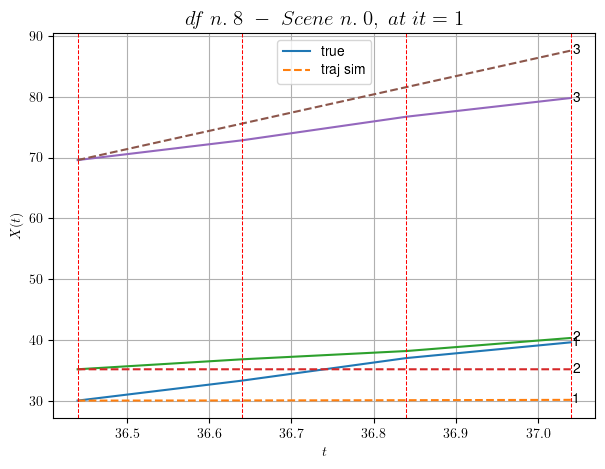

        For scene 0/21
        * use LR_NN=0.001 with err=18.508185527940118 at it=24
        * v0_scn_mean = 30.0
        * MAE = 23.186203074792587



df n.8, scene n.1/21
    We have 4 time intervals inside [50.24,51.04]
            - Time interval n.0: [50.24, 50.44]
                * y_true: [14.83043604 14.50055453]
                * v_ann: [0.17435508966445923, 0.008605514653027058, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [50.44, 50.64]
                * y_true: [15.35052738 17.38080918]
                * v_ann: [0.21374918520450592, 0.013488407246768475, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [50.64, 50.84]
                * y_true: [19.54078826 19.30097894]
                * v_ann: [0.25629693269729614, 0.019976770505309105, 30.0]

----------------------------------------------

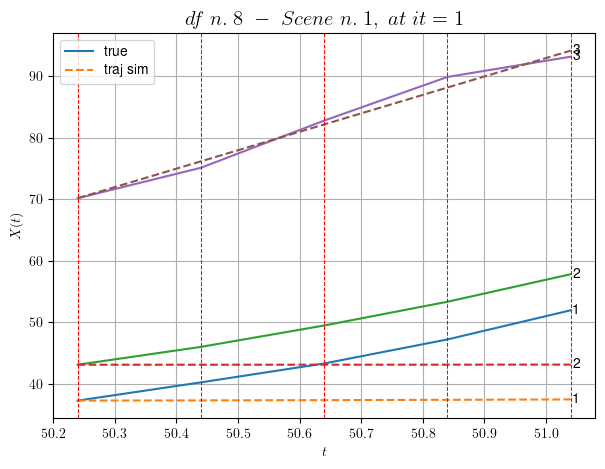

        For scene 1/21
        * use LR_NN=0.001 with err=12.854351121222146 at it=24
        * v0_scn_mean = 30.0
        * MAE = 48.37099625463387



df n.8, scene n.2/21
    We have 4 time intervals inside [102.24,103.04]
            - Time interval n.0: [102.24, 102.44]
                * y_true: [22.78095819 15.94092959]
                * v_ann: [0.5258626341819763, 0.5338518619537354, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [102.44, 102.64]
                * y_true: [23.36120187 12.10080168]
                * v_ann: [0.5452663898468018, 0.5974078178405762, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [102.64, 102.84]
                * y_true: [20.51121756 22.37162153]
                * v_ann: [0.533717930316925, 0.6743441820144653, 30.0]

-------------------------------------------------

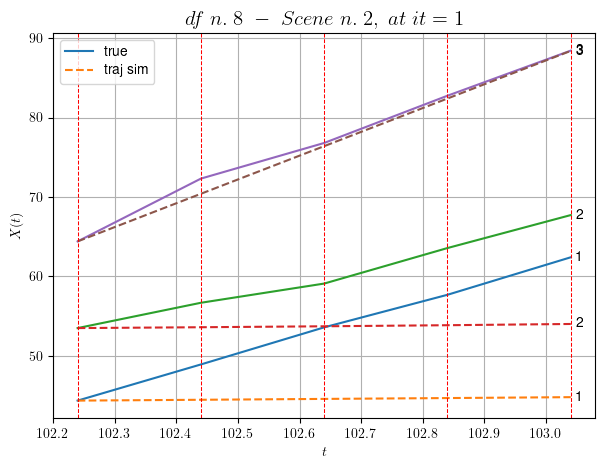

        For scene 2/21
        * use LR_NN=5e-05 with err=12.518378408147464 at it=24
        * v0_scn_mean = 30.0
        * MAE = 60.391407580633



df n.8, scene n.3/21
    We have 3 time intervals inside [108.84,109.44]
            - Time interval n.0: [108.84, 109.04]
                * y_true: [17.9810803  26.65193678]
                * v_ann: [0.5255363583564758, 0.7843300104141235, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [109.04, 109.24]
                * y_true: [14.30252156 22.9019425 ]
                * v_ann: [0.6445542573928833, 0.9106283783912659, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [109.24, 109.44]
                * y_true: [21.24158827 21.25204953]
                * v_ann: [0.7855216860771179, 0.9940809607505798, 30.0]

--------------------------------------------------

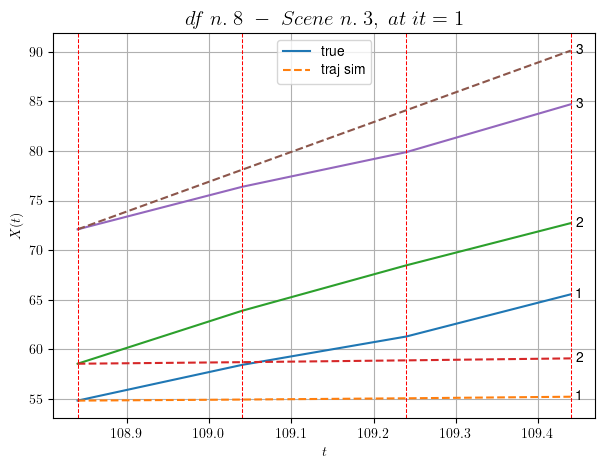

        For scene 3/21
        * use LR_NN=0.0001 with err=6.765707295918603 at it=24
        * v0_scn_mean = 30.0
        * MAE = 42.60187434331926



df n.8, scene n.4/21
    We have 2 time intervals inside [130.04,130.44]
            - Time interval n.0: [130.04, 130.24]
                * y_true: [23.9806113  21.72216875]
                * v_ann: [3.100836753845215, 0.8493635654449463, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [130.24, 130.44]
                * y_true: [20.38064152 27.22317612]
                * v_ann: [18.75551414489746, 5.243144989013672, 30.0]

----------------------------------------------------------------------------------------------------
    * err= 17.09841000872888
    * Learning rate NN = 0.0004500000213738531
    * diff = 1


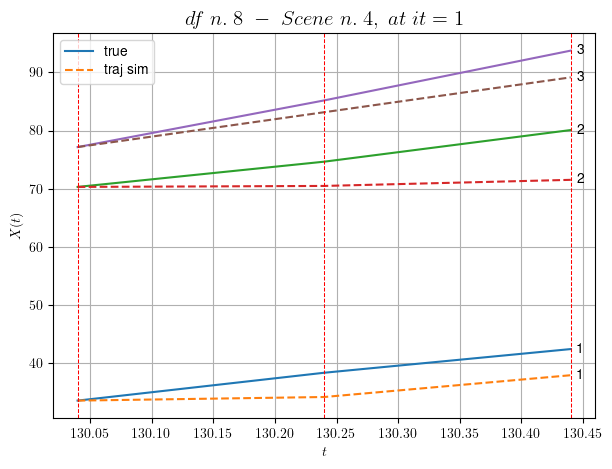

        For scene 4/21
        * use LR_NN=0.0005 with err=10.07961734271896 at it=24
        * v0_scn_mean = 30.0
        * MAE = 17.09841000872888



df n.8, scene n.5/21
    We have 5 time intervals inside [215.24,216.24]
            - Time interval n.0: [215.24, 215.44]
                * y_true: [ 1.34614625 10.42531549]
                * v_ann: [2.244123697280884, 18.152454376220703, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [215.44, 215.64]
                * y_true: [18.28906766 10.32533879]
                * v_ann: [2.467864990234375, 12.862774848937988, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [215.64, 215.84]
                * y_true: [29.02100933 15.78058213]
                * v_ann: [1.8616271018981934, 14.55174732208252, 30.0]

---------------------------------------------------

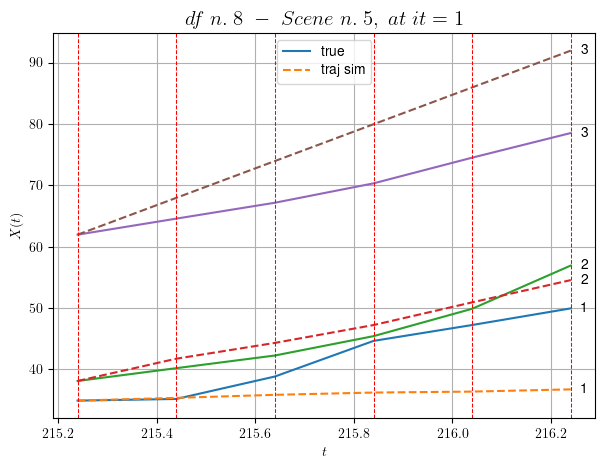

        For scene 5/21
        * use LR_NN=0.0005 with err=43.23163740338529 at it=24
        * v0_scn_mean = 30.0
        * MAE = 47.24581960692356



df n.8, scene n.6/21
    We have 4 time intervals inside [222.64,223.44]
            - Time interval n.0: [222.64, 222.84]
                * y_true: [3.4148313  7.54419185]
                * v_ann: [0.666227400302887, 26.298725128173828, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [222.84, 223.04]
                * y_true: [1.34614625 9.61287691]
                * v_ann: [1.0054304599761963, 23.199413299560547, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [223.04, 223.24]
                * y_true: [ 1.34614625 10.20300693]
                * v_ann: [1.7790653705596924, 21.060453414916992, 30.0]

-----------------------------------------------------

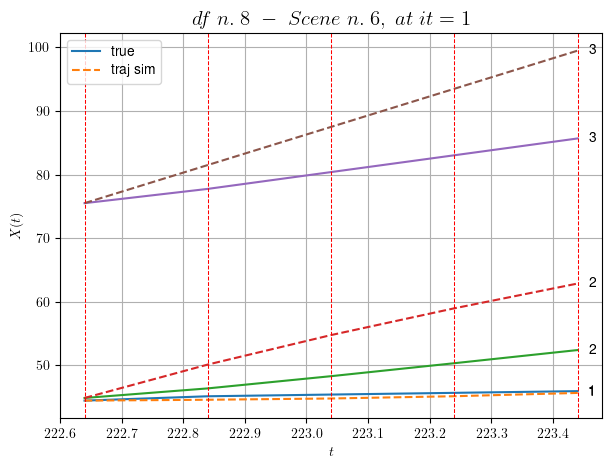

        For scene 6/21
        * use LR_NN=0.0001 with err=25.281494351873636 at it=24
        * v0_scn_mean = 30.0
        * MAE = 40.412269403045535



df n.8, scene n.7/21
    We have 5 time intervals inside [225.24,226.24]
            - Time interval n.0: [225.24, 225.44]
                * y_true: [9.85023046 1.34614625]
                * v_ann: [7.141087055206299, 12.385702133178711, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [225.44, 225.64]
                * y_true: [11.30531094  1.34614625]
                * v_ann: [3.5935540199279785, 8.066408157348633, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [225.64, 225.84]
                * y_true: [12.27536459  1.34614625]
                * v_ann: [2.8390567302703857, 8.489473342895508, 30.0]

---------------------------------------------------

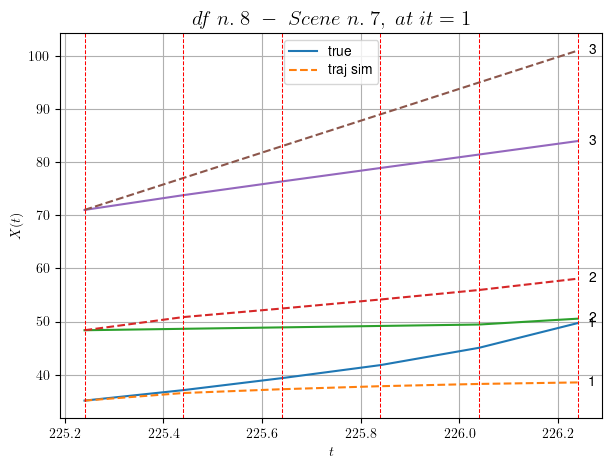

        For scene 7/21
        * use LR_NN=0.001 with err=51.80343331675774 at it=24
        * v0_scn_mean = 30.0
        * MAE = 53.53978518104771



df n.8, scene n.8/21
    We have 4 time intervals inside [227.04,227.84]
            - Time interval n.0: [227.04, 227.24]
                * y_true: [ 1.34614625 11.86069537]
                * v_ann: [1.7322402000427246, 6.9663166999816895, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [227.24, 227.44]
                * y_true: [ 1.34614625 11.90074479]
                * v_ann: [2.63521146774292, 7.792059898376465, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [227.44, 227.64]
                * y_true: [ 1.34614625 14.03099458]
                * v_ann: [3.589171886444092, 9.827442169189453, 30.0]

------------------------------------------------------

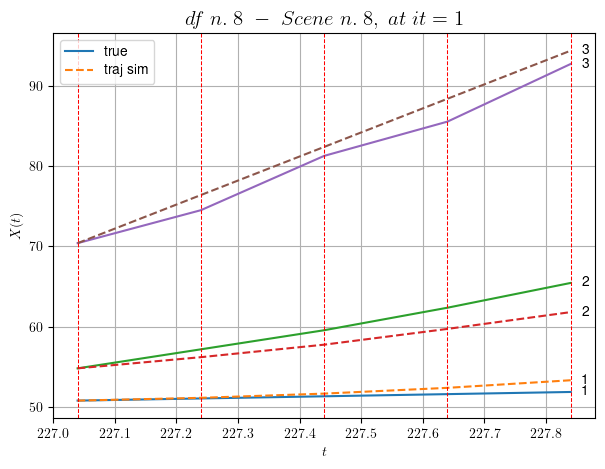

        For scene 8/21
        * use LR_NN=0.0001 with err=2.81839879592062 at it=24
        * v0_scn_mean = 30.0
        * MAE = 2.863854137907649



df n.8, scene n.9/21
    We have 2 time intervals inside [237.64,238.04]
            - Time interval n.0: [237.64, 237.84]
                * y_true: [17.80043487 10.22573725]
                * v_ann: [11.35606861114502, 3.167685031890869, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [237.84, 238.04]
                * y_true: [20.29063338 11.60088234]
                * v_ann: [15.07153606414795, 6.825296878814697, 30.0]

----------------------------------------------------------------------------------------------------
    * err= 1.6547791695544003
    * Learning rate NN = 0.0009000000427477062
    * diff = 1


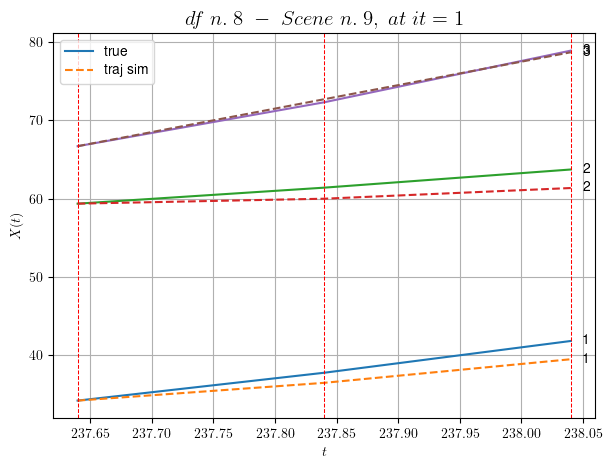

        For scene 9/21
        * use LR_NN=0.001 with err=0.46514777151934344 at it=24
        * v0_scn_mean = 30.0
        * MAE = 1.6547791695544003



df n.8, scene n.10/21
    We have 2 time intervals inside [239.84,240.24]
            - Time interval n.0: [239.84, 240.04]
                * y_true: [16.30079237 13.85576065]
                * v_ann: [2.6645779609680176, 25.189666748046875, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [240.04, 240.24]
                * y_true: [17.06097057 17.27611431]
                * v_ann: [1.1555454730987549, 12.809853553771973, 30.0]

----------------------------------------------------------------------------------------------------
    * err= 5.498661764529697
    * Learning rate NN = 0.0009000000427477062
    * diff = 1


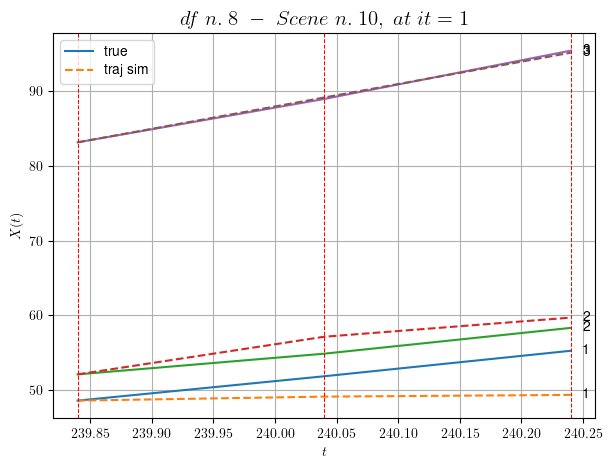

        For scene 10/21
        * use LR_NN=0.001 with err=3.9530919827575297 at it=24
        * v0_scn_mean = 30.0
        * MAE = 5.498661764529697



df n.8, scene n.11/21
    We have 4 time intervals inside [243.44,244.24]
            - Time interval n.0: [243.44, 243.64]
                * y_true: [18.26109982  7.28715228]
                * v_ann: [2.8449795246124268, 7.511707305908203, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [243.64, 243.84]
                * y_true: [23.05153691  9.06731774]
                * v_ann: [1.913773536682129, 9.974440574645996, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [243.84, 244.04]
                * y_true: [10.52334632 16.05532609]
                * v_ann: [0.5740891098976135, 12.48792839050293, 30.0]

--------------------------------------------------

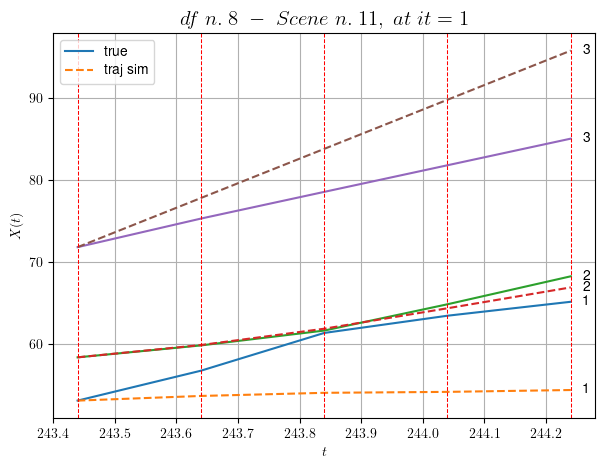

        For scene 11/21
        * use LR_NN=0.0005 with err=28.70571344435759 at it=24
        * v0_scn_mean = 30.0
        * MAE = 32.076093775914245



df n.8, scene n.12/21
    We have 5 time intervals inside [251.64,252.64]
            - Time interval n.0: [251.64, 251.84]
                * y_true: [14.32016282 17.2315068 ]
                * v_ann: [32.86567687988281, 2.5723624229431152, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [251.84, 252.04]
                * y_true: [20.34029568 17.65159646]
                * v_ann: [0.022405168041586876, 0.22940340638160706, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [252.04, 252.24]
                * y_true: [20.93040622 16.61174803]
                * v_ann: [0.08922647684812546, 0.2751113474369049, 30.0]

------------------------------------------

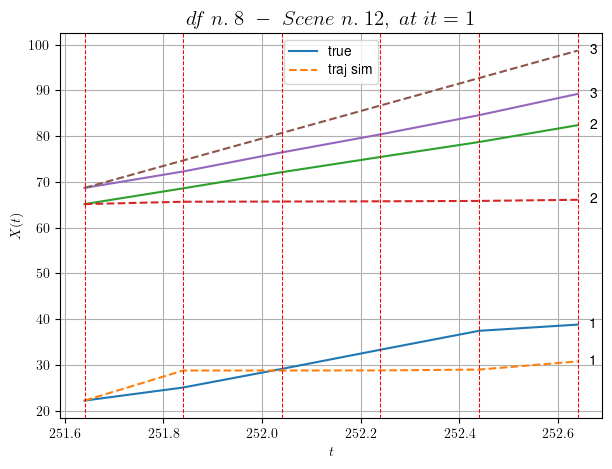

        For scene 12/21
        * use LR_NN=0.001 with err=38.370614773481414 at it=24
        * v0_scn_mean = 30.0
        * MAE = 53.58366353994729



df n.8, scene n.13/21
    We have 3 time intervals inside [290.84,291.44]
            - Time interval n.0: [290.84, 291.04]
                * y_true: [10.67508652 21.71084933]
                * v_ann: [6.551661968231201, 9.876973152160645, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [291.04, 291.24]
                * y_true: [ 9.47510968 18.71084105]
                * v_ann: [15.659087181091309, 21.750825881958008, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [291.24, 291.44]
                * y_true: [ 9.47510968 24.76138307]
                * v_ann: [8.824125289916992, 12.42358112335205, 30.0]

--------------------------------------------------

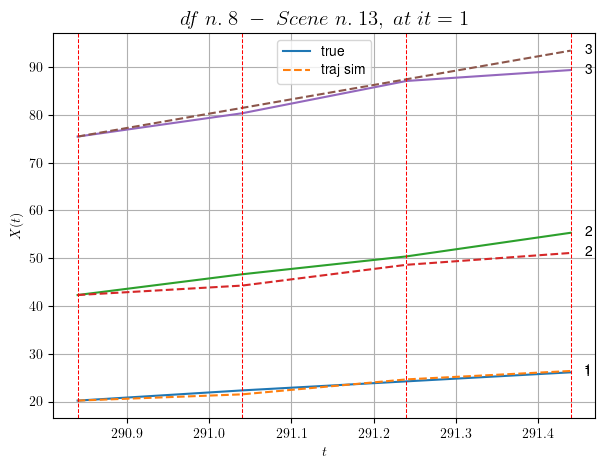

        For scene 13/21
        * use LR_NN=0.001 with err=2.259600805985125 at it=24
        * v0_scn_mean = 30.0
        * MAE = 3.7848264768665874



df n.8, scene n.14/21
    We have 5 time intervals inside [350.64,351.64]
            - Time interval n.0: [350.64, 350.84]
                * y_true: [14.24956692  9.34769854]
                * v_ann: [1.2058817148208618, 14.626777648925781, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [350.84, 351.04]
                * y_true: [ 4.06677119 24.77080184]
                * v_ann: [0.7103756666183472, 16.065624237060547, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [351.04, 351.24]
                * y_true: [15.46321179 18.97073364]
                * v_ann: [2.7828447818756104, 14.893194198608398, 30.0]

----------------------------------------------

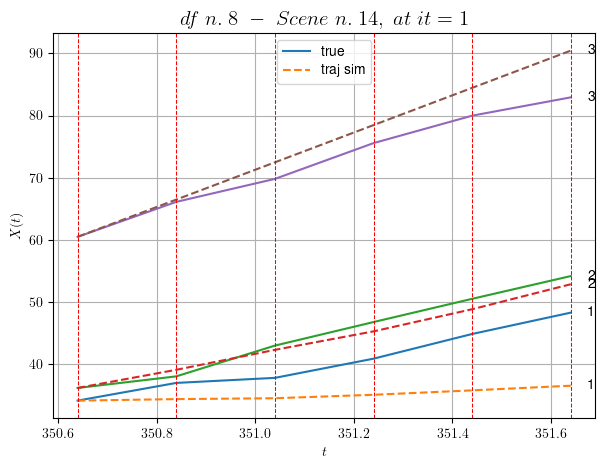

        For scene 14/21
        * use LR_NN=0.0005 with err=19.28979001418492 at it=24
        * v0_scn_mean = 30.0
        * MAE = 20.73990573257682



df n.8, scene n.15/21
    We have 3 time intervals inside [368.84,369.44]
            - Time interval n.0: [368.84, 369.04]
                * y_true: [17.45059381  8.87536169]
                * v_ann: [3.2528791427612305, 19.67087173461914, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [369.04, 369.24]
                * y_true: [23.11801305  8.05829994]
                * v_ann: [1.5579307079315186, 15.353654861450195, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [369.24, 369.44]
                * y_true: [ 6.12528304 15.69072344]
                * v_ann: [0.380599707365036, 17.44487190246582, 30.0]

-------------------------------------------------

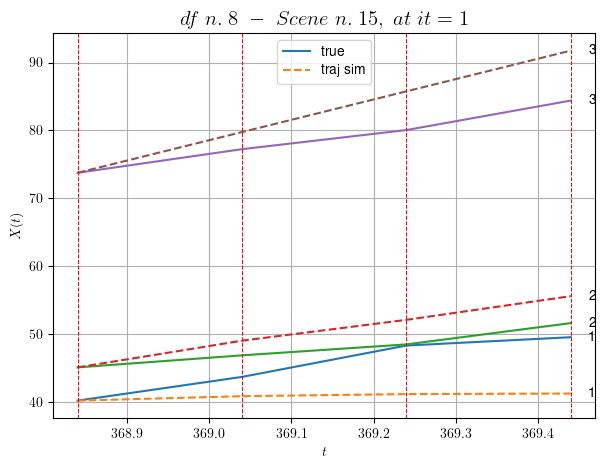

        For scene 15/21
        * use LR_NN=0.001 with err=18.68862190214133 at it=24
        * v0_scn_mean = 30.0
        * MAE = 21.22474755303241



df n.8, scene n.16/21
    We have 2 time intervals inside [414.44,414.84]
            - Time interval n.0: [414.44, 414.64]
                * y_true: [25.58017481 23.93124381]
                * v_ann: [12.853449821472168, 11.521814346313477, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [414.64, 414.84]
                * y_true: [28.7103211   9.12051681]
                * v_ann: [14.958006858825684, 12.881290435791016, 30.0]

----------------------------------------------------------------------------------------------------
    * err= 10.310098498720345
    * Learning rate NN = 8.999999408842996e-05
    * diff = 1


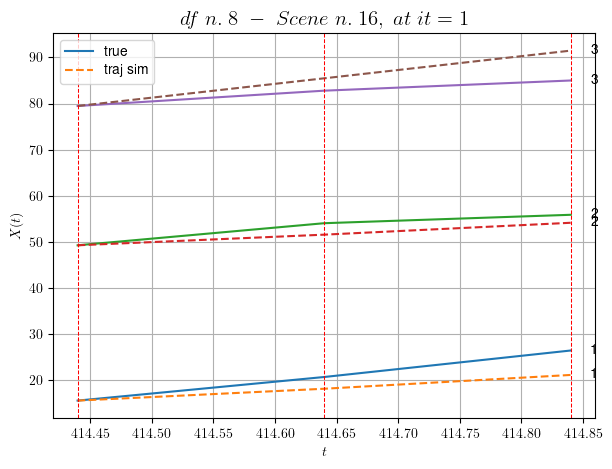

        For scene 16/21
        * use LR_NN=0.0001 with err=6.088042246140663 at it=24
        * v0_scn_mean = 30.0
        * MAE = 10.310098498720345



df n.8, scene n.17/21
    We have 5 time intervals inside [477.84,478.84]
            - Time interval n.0: [477.84, 478.04]
                * y_true: [17.90015387 15.74042221]
                * v_ann: [7.8202080726623535, 13.546188354492188, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [478.04, 478.24]
                * y_true: [18.02021575 17.32056356]
                * v_ann: [11.898728370666504, 21.807910919189453, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [478.24, 478.44]
                * y_true: [20.95033635 22.3908747 ]
                * v_ann: [11.180326461791992, 20.73770523071289, 30.0]

----------------------------------------------

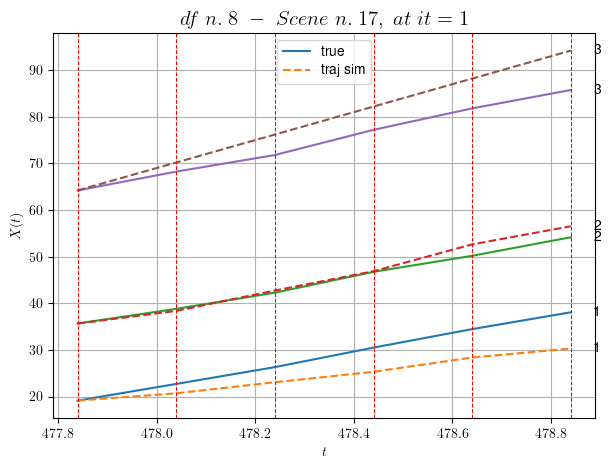

        For scene 17/21
        * use LR_NN=0.001 with err=16.24047725271616 at it=24
        * v0_scn_mean = 30.0
        * MAE = 17.30437450924771



df n.8, scene n.18/21
    We have 2 time intervals inside [522.64,523.04]
            - Time interval n.0: [522.64, 522.84]
                * y_true: [ 6.78505349 16.71042372]
                * v_ann: [10.69476318359375, 26.140174865722656, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [522.84, 523.04]
                * y_true: [ 7.85007105 23.28071684]
                * v_ann: [10.94110107421875, 24.986183166503906, 30.0]

----------------------------------------------------------------------------------------------------
    * err= 1.9111842499604685
    * Learning rate NN = 8.999999408842996e-05
    * diff = 1


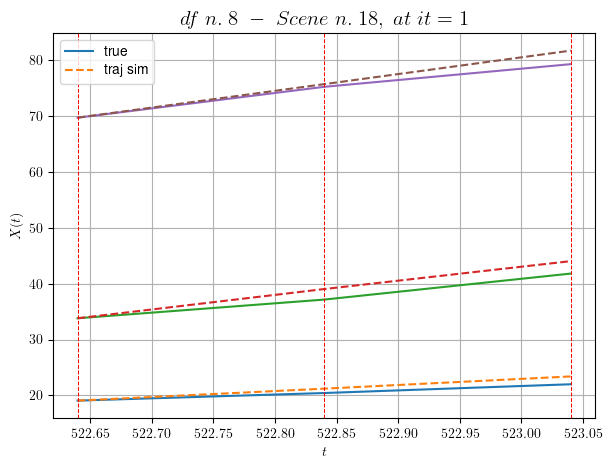

        For scene 18/21
        * use LR_NN=0.0001 with err=0.8915467643358612 at it=24
        * v0_scn_mean = 30.0
        * MAE = 1.9111842499604685



df n.8, scene n.19/21
    We have 7 time intervals inside [593.04,594.44]
            - Time interval n.0: [593.04, 593.24]
                * y_true: [18.14041096 18.46062677]
                * v_ann: [4.568700790405273, 5.543047904968262, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [593.24, 593.44]
                * y_true: [15.67042287 23.16095213]
                * v_ann: [4.816807270050049, 5.385202884674072, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [593.44, 593.64]
                * y_true: [13.25043489 21.00101152]
                * v_ann: [6.045594692230225, 5.933053970336914, 30.0]

--------------------------------------------------

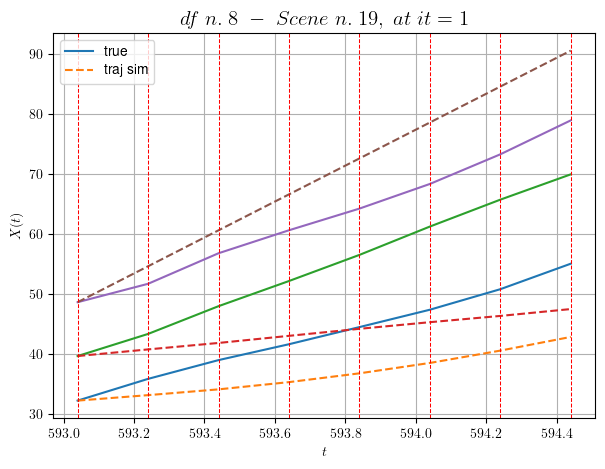

        For scene 19/21
        * use LR_NN=0.0001 with err=30.51111870641918 at it=24
        * v0_scn_mean = 30.0
        * MAE = 99.17363633393863



df n.8, scene n.20/21
    We have 4 time intervals inside [256.44,257.24]
            - Time interval n.0: [256.44, 256.64]
                * y_true: [ 7.48303167 10.07767618 21.73093279]
                * v_ann: [0.4242810606956482, 0.5024822950363159, 17.474241256713867, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [256.64, 256.84]
                * y_true: [13.09283525 13.17831107 21.42106847]
                * v_ann: [0.6241253018379211, 1.7372232675552368, 14.88014030456543, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [256.84, 257.04]
                * y_true: [11.5255681  16.82586504 17.99104223]
                * v_ann: [0.6823052167892456

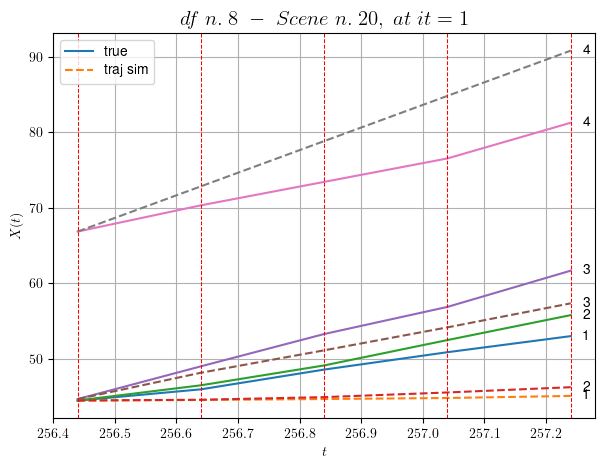

        For scene 20/21
        * use LR_NN=0.001 with err=16.42001501835526 at it=24
        * v0_scn_mean = 30.0
        * MAE = 25.275600038231055



For df=8 with 21 scenes, time taken:        93.85
****************************************************************************************************
****************************************************************************************************
In df n.9/2 we have 9 scenes
df n.9, scene n.0/9
    We have 3 time intervals inside [5.40,6.00]
            - Time interval n.0: [5.40, 5.60]
                * y_true: [17.46255149 32.38946228]
                * v_ann: [2.182368516921997, 0.2373412847518921, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [5.60, 5.80]
                * y_true: [27.89361325 30.52270411]
                * v_ann: [13.834939956665039, 1.6071515083312988, 30.0]

--------------------------------------------------------

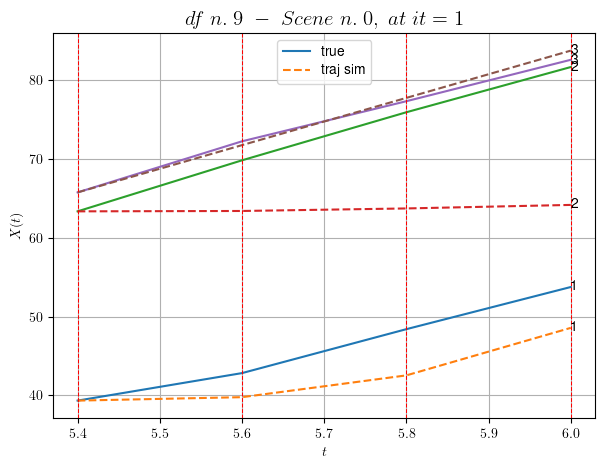

        For scene 0/9
        * use LR_NN=0.001 with err=26.002354310385872 at it=24
        * v0_scn_mean = 30.0
        * MAE = 47.44271430176426



df n.9, scene n.1/9
    We have 2 time intervals inside [20.80,21.20]
            - Time interval n.0: [20.80, 21.00]
                * y_true: [29.01888251 26.46522664]
                * v_ann: [2.614600658416748, 28.295679092407227, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [21.00, 21.20]
                * y_true: [29.93697896 25.84808908]
                * v_ann: [2.2092857360839844, 30.361347198486328, 30.0]

----------------------------------------------------------------------------------------------------
    * err= 16.564340191743057
    * Learning rate NN = 0.0004500000213738531
    * diff = 1


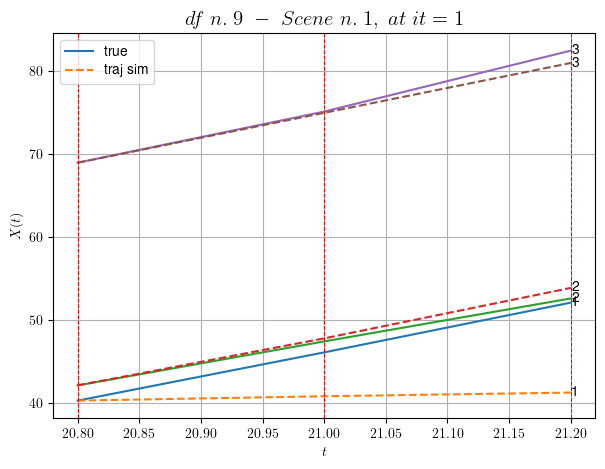

        For scene 1/9
        * use LR_NN=0.0005 with err=15.272143293086188 at it=24
        * v0_scn_mean = 30.0
        * MAE = 16.564340191743057



df n.9, scene n.2/9
    We have 6 time intervals inside [37.80,39.00]
            - Time interval n.0: [37.80, 38.00]
                * y_true: [21.35828745 27.25004814]
                * v_ann: [17.711538314819336, 7.034289836883545, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [38.00, 38.20]
                * y_true: [19.23626153 17.91519282]
                * v_ann: [23.26526641845703, 7.379742622375488, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [38.20, 38.40]
                * y_true: [24.96063116 28.62771944]
                * v_ann: [22.4741268157959, 9.330557823181152, 30.0]

--------------------------------------------------------------

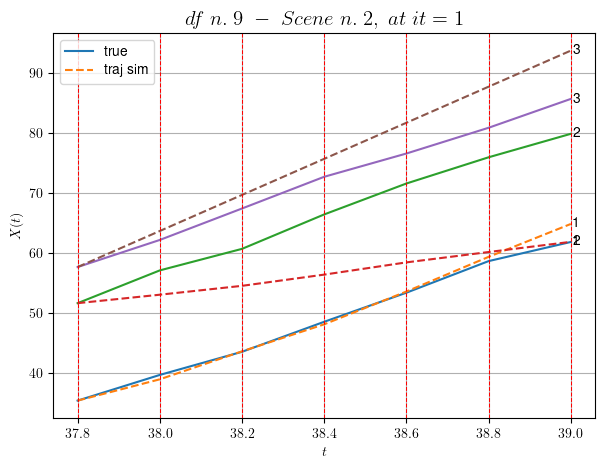

        For scene 2/9
        * use LR_NN=0.0005 with err=44.042505501479106 at it=24
        * v0_scn_mean = 30.0
        * MAE = 50.543608261759495



df n.9, scene n.3/9
    We have 2 time intervals inside [44.40,44.80]
            - Time interval n.0: [44.40, 44.60]
                * y_true: [24.95803839 22.94664651]
                * v_ann: [18.286190032958984, 36.33652114868164, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [44.60, 44.80]
                * y_true: [22.38974011 30.85088397]
                * v_ann: [16.889440536499023, 33.622718811035156, 30.0]

----------------------------------------------------------------------------------------------------
    * err= 6.150828260705016
    * Learning rate NN = 8.999999408842996e-05
    * diff = 1


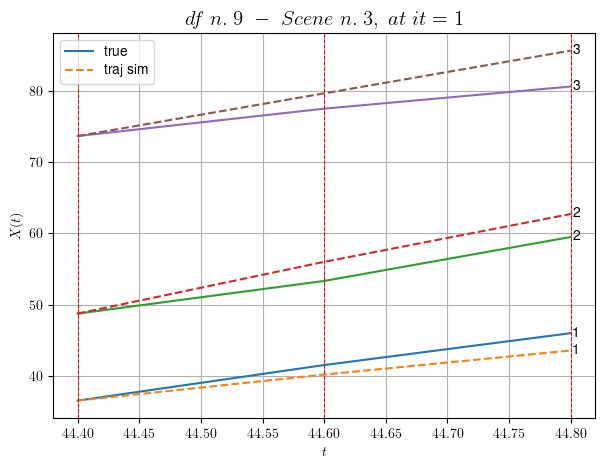

        For scene 3/9
        * use LR_NN=0.0001 with err=5.552492969699287 at it=24
        * v0_scn_mean = 30.0
        * MAE = 6.150828260705016



df n.9, scene n.4/9
    We have 3 time intervals inside [117.80,118.40]
            - Time interval n.0: [117.80, 118.00]
                * y_true: [26.21501314 26.51617559]
                * v_ann: [16.923839569091797, 40.72714614868164, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [118.00, 118.20]
                * y_true: [24.27291409 32.45579962]
                * v_ann: [8.14461898803711, 20.26388168334961, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [118.20, 118.40]
                * y_true: [21.96072195 23.86482679]
                * v_ann: [19.181978225708008, 43.03990173339844, 30.0]

-------------------------------------------------------

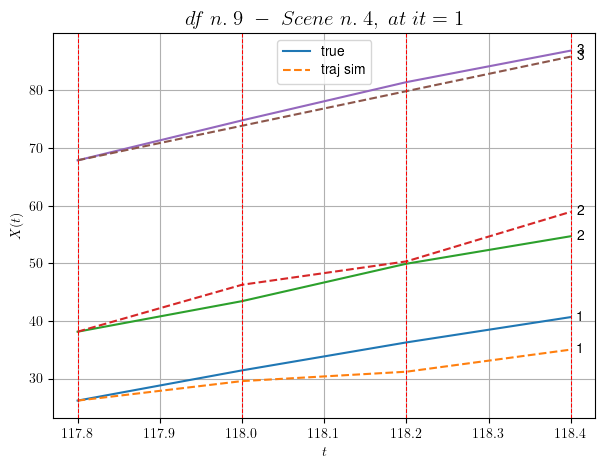

        For scene 4/9
        * use LR_NN=0.001 with err=8.572347371236864 at it=24
        * v0_scn_mean = 30.0
        * MAE = 7.643311507506972



df n.9, scene n.5/9
    We have 2 time intervals inside [119.20,119.60]
            - Time interval n.0: [119.20, 119.40]
                * y_true: [23.20444186 22.52067771]
                * v_ann: [6.680131912231445, 6.058108329772949, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [119.40, 119.60]
                * y_true: [27.39348249 26.5570173 ]
                * v_ann: [6.989526748657227, 6.738837718963623, 30.0]

----------------------------------------------------------------------------------------------------
    * err= 14.577968339842242
    * Learning rate NN = 4.499999704421498e-05
    * diff = 1


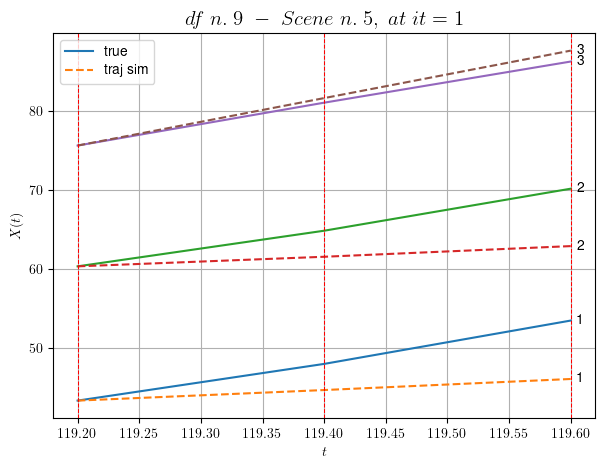

        For scene 5/9
        * use LR_NN=5e-05 with err=0.40528263600106124 at it=24
        * v0_scn_mean = 30.0
        * MAE = 14.577968339842242



df n.9, scene n.6/9
    We have 2 time intervals inside [120.20,120.60]
            - Time interval n.0: [120.20, 120.40]
                * y_true: [30.48045094 26.16776015]
                * v_ann: [10.352249145507812, 13.864431381225586, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [120.40, 120.60]
                * y_true: [26.23623075 25.12734403]
                * v_ann: [21.01662826538086, 29.148887634277344, 30.0]

----------------------------------------------------------------------------------------------------
    * err= 5.777085893565428
    * Learning rate NN = 0.0004500000213738531
    * diff = 1


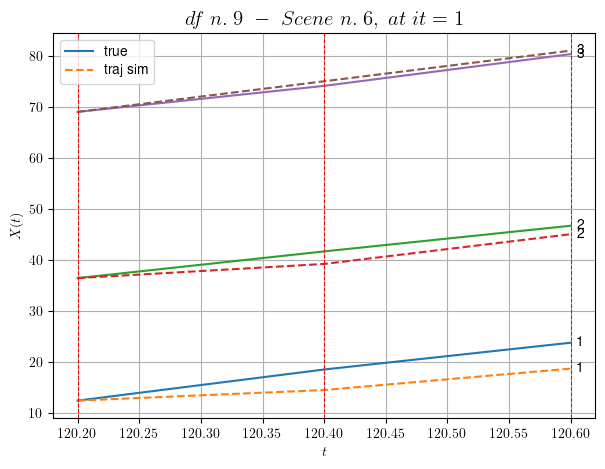

        For scene 6/9
        * use LR_NN=0.0005 with err=1.8242362652373032 at it=24
        * v0_scn_mean = 30.0
        * MAE = 5.777085893565428



df n.9, scene n.7/9
    We have 3 time intervals inside [121.40,122.00]
            - Time interval n.0: [121.40, 121.60]
                * y_true: [23.88369588 31.34452269]
                * v_ann: [2.304824113845825, 22.2291259765625, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [121.60, 121.80]
                * y_true: [22.66516063 24.1738881 ]
                * v_ann: [3.6987950801849365, 22.861738204956055, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [121.80, 122.00]
                * y_true: [27.39865086 24.79107704]
                * v_ann: [4.028695583343506, 23.500516891479492, 30.0]

-----------------------------------------------------

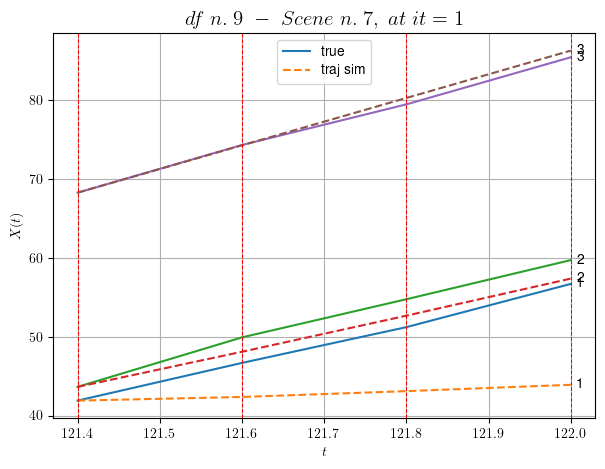

        For scene 7/9
        * use LR_NN=0.0001 with err=19.342207433679526 at it=24
        * v0_scn_mean = 30.0
        * MAE = 21.860207807822608



df n.9, scene n.8/9
    We have 2 time intervals inside [205.80,206.20]
            - Time interval n.0: [205.80, 206.00]
                * y_true: [16.81767795  9.52209489]
                * v_ann: [19.091127395629883, 16.115388870239258, 30.0]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [206.00, 206.20]
                * y_true: [13.65726133  9.1692133 ]
                * v_ann: [14.946433067321777, 15.687267303466797, 30.0]

----------------------------------------------------------------------------------------------------
    * err= 2.0501996939094163
    * Learning rate NN = 0.0004500000213738531
    * diff = 1


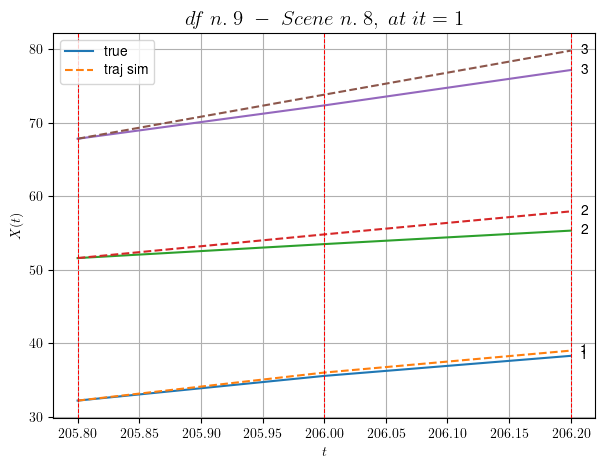

        For scene 8/9
        * use LR_NN=0.0005 with err=1.3297519651896135 at it=24
        * v0_scn_mean = 30.0
        * MAE = 2.0501996939094163



For df=9 with 9 scenes, time taken:        31.37
****************************************************************************************************

Time taken for the computation: 125.22
----------------------------------------------------------------------------------------------------


In [6]:
info_dataset = solve_nn_dataset(doe, v0_guess, dataset, processed_flag, NUM_ITER, LEARNING_RATE_v0=0.5)

## Plot

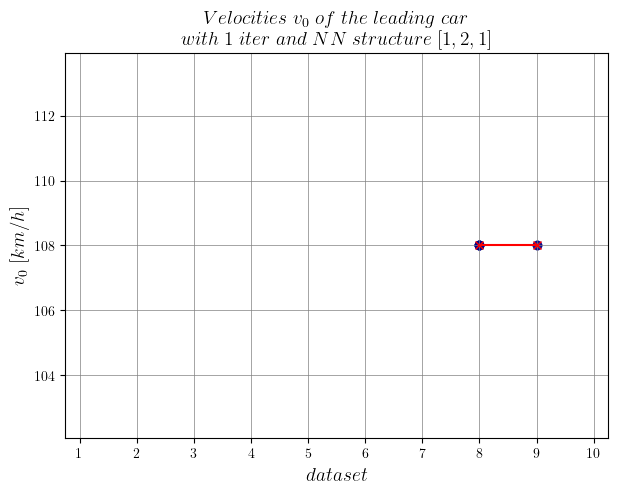

In [7]:
# Initialize the figure
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

ms2kmh = 3.6

for _, scn in info_dataset.iterrows():

    # Convert velocities to km/h
    v0_scn_mean_kmh = scn['v0_scn_mean']*ms2kmh

    # For each scene, plot v0 mean (averagin over iterations)
    ax.scatter(scn['N. file'], v0_scn_mean_kmh, alpha = .2, color = 'darkblue');

# For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
for nf, p in info_grouped.iterrows():
    ax.plot(nf, p['v0_scn_mean']*ms2kmh, color = 'r', marker="x")

# Plot v0 mean over all dfs
alldfs = [a for a, _ in info_grouped.iterrows()]
v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = 'r')  

ax.set_xlabel(r"$data set$",fontsize=14)
ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car$"
               "\n"  # Newline: the backslash is interpreted as usual
             fr"$with\ {NUM_ITER}\ iter\ and\ NN\ structure\ {str(doe)}$",fontsize=14)

xlim = [0.75,10.25]
ax.set_xlim(xlim)
ax.set_xticks(range(1,11))
ylim = ax.get_ylim()

ax.grid(color='grey', linestyle='-', linewidth=0.5);

plt.show()

> **WARNING**: The maximal km speed allowed on the highway is 100 h

### Initialize the output dir

In [8]:
# Prepare the directory..
if flag_save:
    
    df_seen = [df['N. file'][0] for df in dataset]
    df_seen_str = '-'.join(str(x) for x in df_seen)
    
    # Create directory where to save the image
    now = datetime.now() 
    d = now.strftime(f"%Y-%m-%d_%H-%M-%S_df{df_seen_str}_{NUM_ITER}it")
    
    path = 'out/' + d
    os.mkdir(path)

In [9]:
# Save figure
if flag_save:
    
    ext = ".svg"
    
#     xs = DOE[0]
#     s = ''.join(str(x) for x in xs)
    
    title = f"/v0_df{df_seen_str}_{NUM_ITER}it"
    
    fig.savefig(path+title+ext, bbox_inches='tight')

### Store data in .txt

In [10]:
# Save the solution in a file
if flag_save:
    
    namefile = '/info_dataset.txt'

    with open(path + namefile, 'w') as output:
        info_dataset.to_csv(path + namefile, sep=',', index=False)

### Load back the df

In [11]:
# path + namefile
# colnames = ['t_list', 'x_list', 'v_list', 'v0_scn', 'v0_scn_mean', 'n_scn', 'N. file', 'iter', 'DOE', 'processed']
# A = pd.read_csv(path + namefile, sep=',', usecols= colnames)